In [8]:
import keras

(train_input, train_target), (test_input, test_target) =\
      keras.datasets.fashion_mnist.load_data()

In [9]:
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [10]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 옵티마이저 : 손실값으로 가중치와 절편을 조정, 다시 학습(배치 단위) : 역전파(Back Propagation)
- 기본 경사하강법 옵티마이저 
    - SGD 
        - 모멘텀 최적화
        - 네스테로프 경사 가속

- 적응적 학습률 경사하강법 옵티마이저
    - AdaGrad 
    - RMSprop

- 적응적 학습률 + 모멘텀 최적화
    - Adam 

- learning_rate 기본값 : 0.1

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7631 - loss: 0.6847
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8553 - loss: 0.4024
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3542
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8786 - loss: 0.3331
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3144


In [14]:
history.history

{'accuracy': [0.8102083206176758,
  0.8571041822433472,
  0.8706458210945129,
  0.8806458115577698,
  0.8843541741371155],
 'loss': [0.5396974086761475,
  0.39636707305908203,
  0.3546789884567261,
  0.33163633942604065,
  0.3187452256679535]}

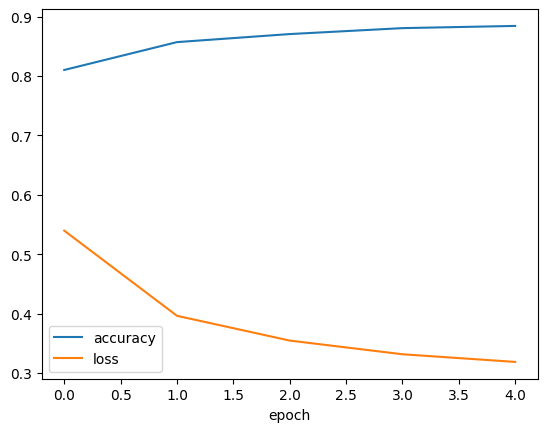

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

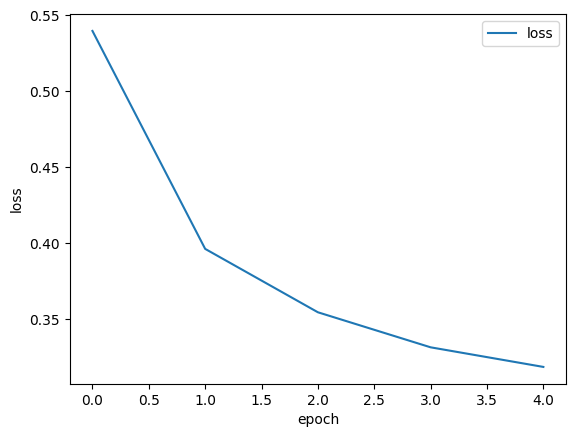

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
# Adam 옵티마이저 적용
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# learning_rate 설정 
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6496 - loss: 1.0978
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8256 - loss: 0.5204
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8459 - loss: 0.4606
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8515 - loss: 0.4392
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.4116


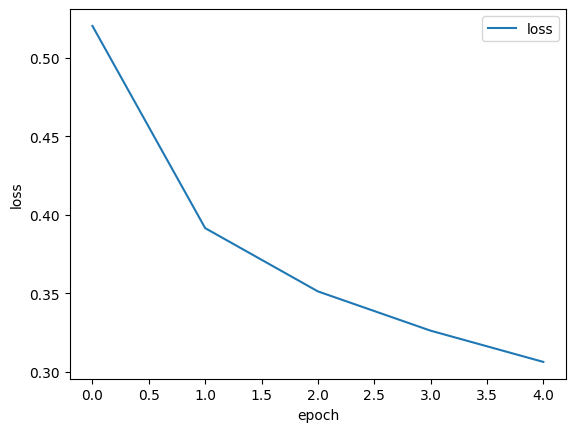

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()